 **Planets of our Galaxie images classifer**

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt 
import time

C:\Users\Arsalene\AppData\Local\Temp\ipykernel_9044\2231553665.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
os.listdir('Data')

['Earth', 'Jupiter', 'Mars', 'Mercury', 'Neptune', 'Saturn', 'Uranus', 'Venus']

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
imgs_ex= ["png", "jpeg","jpg","bmp"]

**1. Remove Bad Images** 

In [5]:
for image_class in os.listdir('Data'):
    for image in os.listdir(os.path.join("Data",image_class)):
        image_path=os.path.join("Data", image_class, image)
        try:
            img= cv2.imread(image_path)
            tip= imghdr.what(image_path)
            if tip not in imgs_ex:
                print("unvalid extension{}".format(image_path))
                os.remove(image_path)
        except Exception as e :
            print("issue with the image{}".format(image_path))

issue with the imageData\Earth\.ipynb_checkpoints
issue with the imageData\Mars\.ipynb_checkpoints


**2. Prepare the Data**

In [6]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [7]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 999 files belonging to 8 classes.


In [8]:
data_iterator=data.as_numpy_iterator()

In [9]:
batch=data_iterator.next()

In [10]:
batch[0].shape

(32, 256, 256, 3)

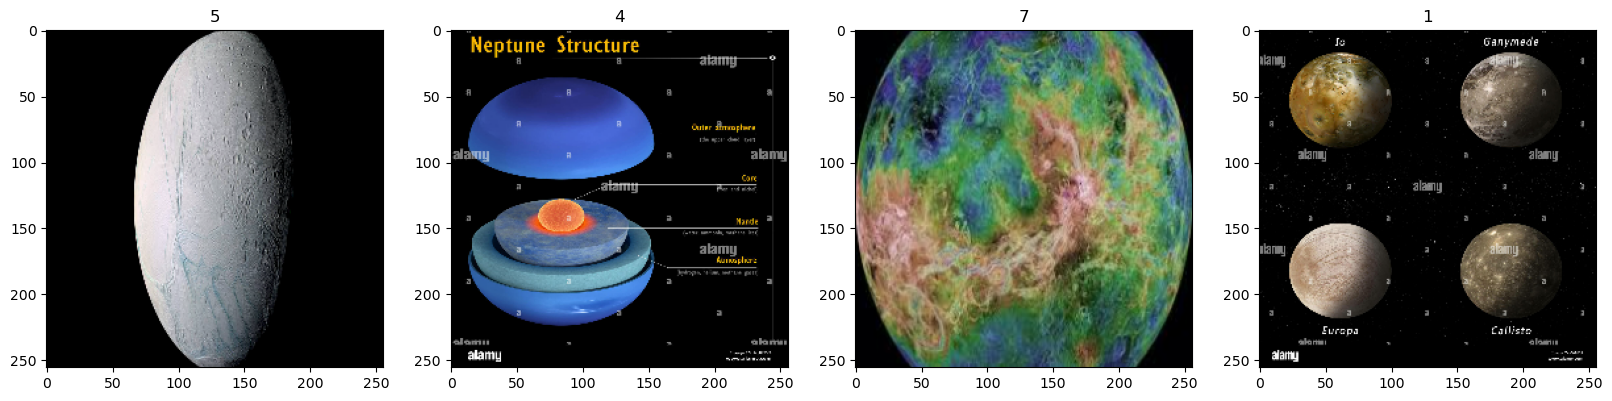

In [11]:
fig , ax =plt.subplots(ncols=4 ,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Classes**: 0=Earth , 1= jupiter , 2= Mars , 3= Mercury ,4= Neptune ,5= Satrun ,6= Uranus ,7= Venus

**3. Preprossing data**

**3.1 scaling data**

In [12]:
scaled = data.map(lambda x, y:(x/255 ,y))

In [13]:
scaled_it= scaled.as_numpy_iterator()

In [14]:
batch=scaled_it.next()

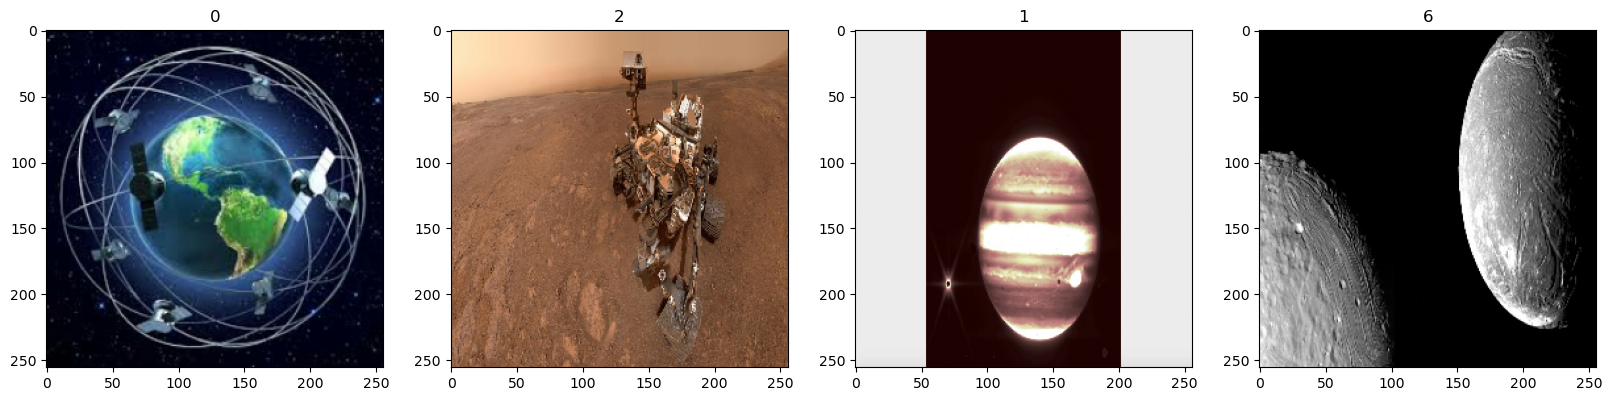

In [15]:
fig , ax =plt.subplots(ncols=4 ,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

**3.2 Spliting the data**

In [16]:
len(data)

32

In [17]:
train_size = int(len(data)*.7)+1
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [18]:
from tensorflow.keras.utils import to_categorical
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

for batch in train:
     images, labels = batch
     
     X_train =images
     y_train=labels



for batch in val:
     images, labels = batch
     X_val =images
     y_val=labels
y_val=to_categorical(y_train, num_classes=8)



**4.Deep Model**

**4.1: Building the Deep Learning Model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
# Create a Sequential model
model = Sequential()
# Convolutional layers
model.add(Conv2D(128, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))  # 8 classes, so 8 neurons and 'softmax' activation

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)     

**4.1: Training the model**

In [23]:
logdir='log'

In [24]:
callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
# Compile the model

history = model.fit(train, epochs=50  , batch_size=8 , validation_data=val , callbacks=[callback])



Epoch 1/50


17/23 [=====================>........] - ETA: 45s - loss: 11.7634 - accuracy: 0.1085

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    #axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
 
plot_model_history(history)

**4.3:Testing**

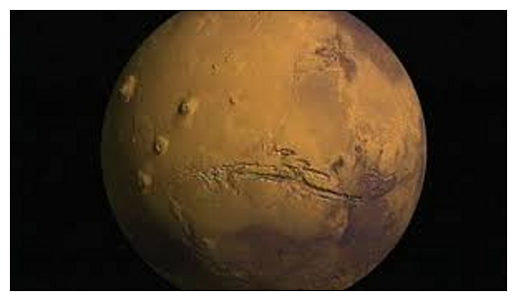

1/1 [==============================] - 0s 28ms/step
	Earth ==> 18.18 %
	Jupiter ==> 62.18 %
	Mars ==> 0.84 %
	Mercury ==> 4.56 %
	Neptune ==> 7.10 %
	Saturn ==> 0.83 %
	Uranus ==> 0.49 %
	Venus ==> 5.82 %


In [40]:
img = cv2.imread('Mars.jpeg')
# show the image 
plt.imshow(cv2.cvtColor(img), interpolation='spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])
class_names=os.listdir('Data')
predic = model.predict(img)
 
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, predic[0][i]*100))
        i = i + 1